In [1]:
%run 'Functions.ipynb'

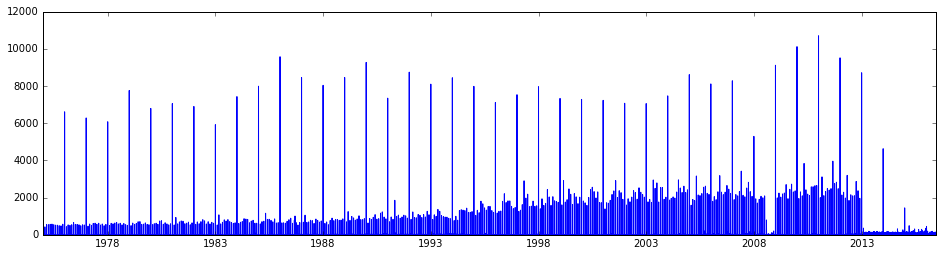

In [2]:
x, y = unzip(hist_data(None, '1975-01-01', '2017-01-01'))
plt.plot(x, y)

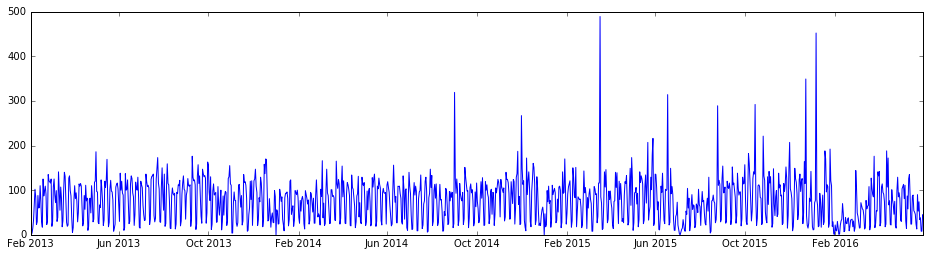

In [3]:
x, y = unzip(hist_data(None, '2013-02-01', '2016-06-01'))
y[y >= 1000] = 0
plt.plot(x, y)

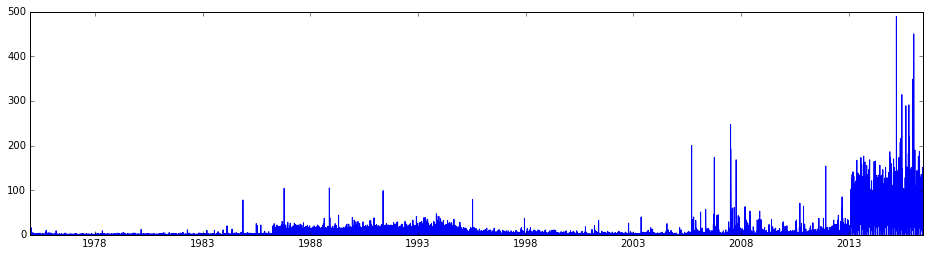

In [5]:
x, y = unzip(hist_data_precise(None, '1975-01-01', '2017-01-01'))
plt.plot(x, y)

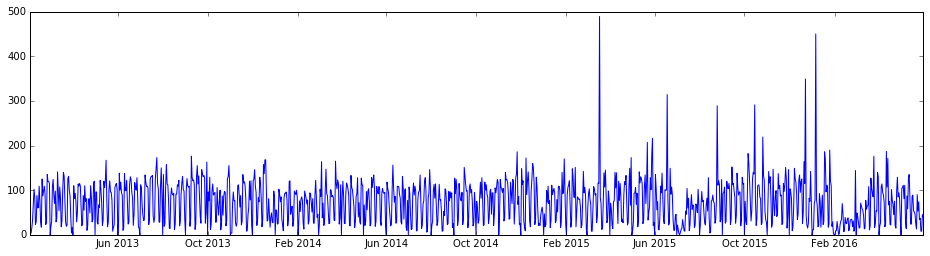

In [6]:
x, y = unzip(hist_data_precise(None, '2013-02-01', '2016-06-01'))
plt.plot(x, y)

In [7]:
sum(y)

89388

In [9]:
recid_min_date_index = reverse_date_references()

In [10]:
# missing preprint date
len([e for e in list(recid_min_date_index.values()) if e['preprint_date'] is None])

15490

In [11]:
len(recid_min_date_index.keys())

217694

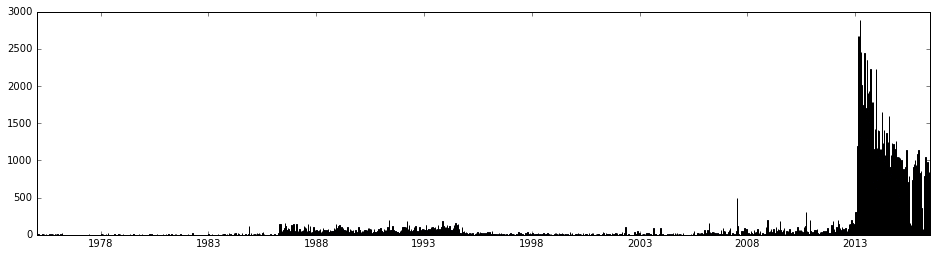

In [12]:
plt.hist([e['earliest_date'] for e in recid_min_date_index.values()], bins=2000)
plt.show()

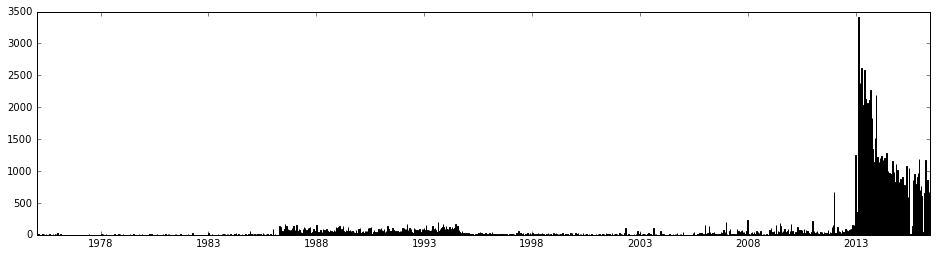

In [13]:
plt.hist([e['preprint_date'] for e in recid_min_date_index.values() if e['preprint_date'] is not None], bins=2000)
plt.show()

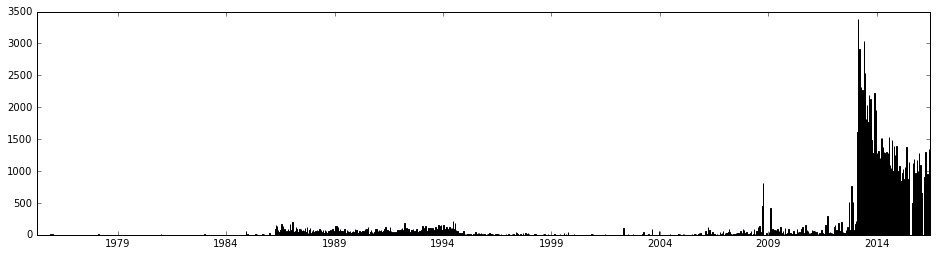

In [14]:
plt.hist([e['modification_date'] for e in recid_min_date_index.values()], bins=2000)
plt.show()

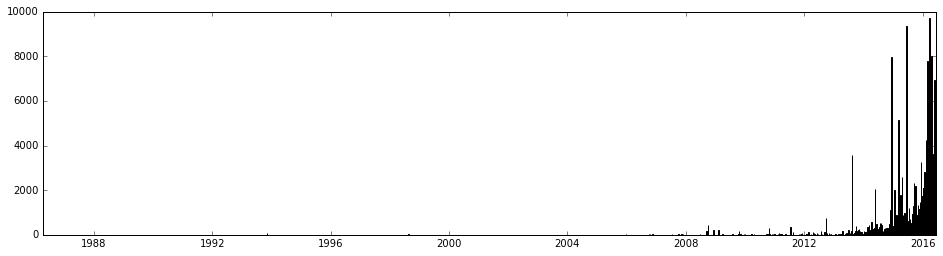

In [15]:
plt.hist([e['creation_date'] for e in recid_min_date_index.values()], bins=2000)
plt.show()

In [17]:
precise = precise_recid()
len(precise)

130758

In [18]:
relocated = set(recid_min_date_index.keys())
new_relocated_recid = relocated.difference(set([e[0] for e in precise]))
len(new_relocated_recid)

181469

In [19]:
len(new_relocated_recid) / len(relocated) * 100

83.35966999549827

In [20]:
diffs = []
for recid, earliest_date in precise:
    if recid in recid_min_date_index:
        relocation = recid_min_date_index[recid]
        delta = relocation['earliest_date'].timestamp() - earliest_date.timestamp()
        delta /= 24 * 60 * 60
        diffs.append(delta)

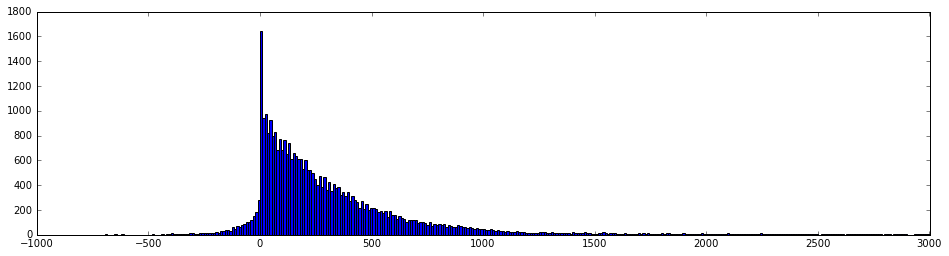

In [21]:
plt.hist(diffs, bins=2000)
plt.xlim(-1000, 3000)
plt.show()

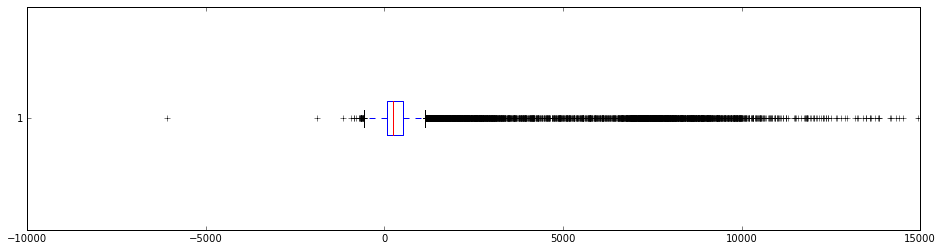

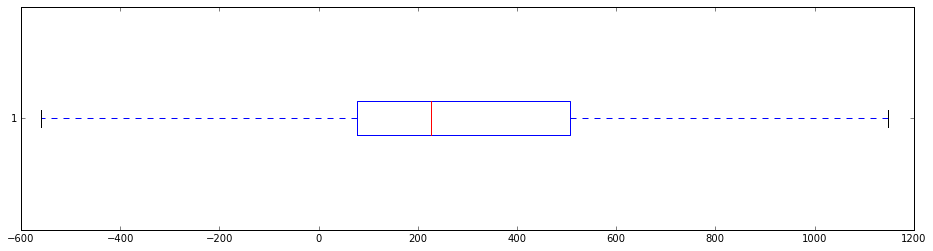

In [22]:
plt.boxplot(diffs, vert=False)
plt.show()
plt.boxplot(diffs, vert=False, sym='')
plt.show()

In [23]:
len(diffs)

36225

In [24]:
np.std(diffs)

1771.8605057850209

In [25]:
np.mean(diffs)

740.73198757763964

In [26]:
sp.stats.percentileofscore(diffs, 0)

5.6507936507936503

In [27]:
np.percentile(diffs, 94)

2953.0783333333288

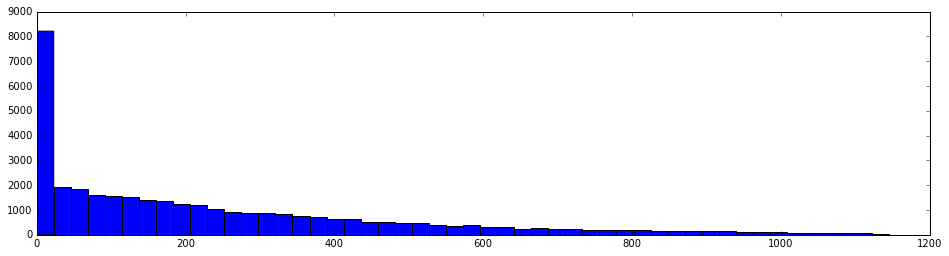

In [28]:
diffs_sign = np.array(diffs)
diffs_sign[diffs_sign < 0] = 0
diffs_sign[diffs_sign > np.percentile(diffs, 90)] = 0
plt.hist(diffs_sign, bins=50)
plt.show()

In [29]:
np.mean(diffs_sign)

239.04563837129055

In [30]:
np.std(diffs_sign)

252.06125013663646

In [31]:
np.count_nonzero(diffs_sign)

30313

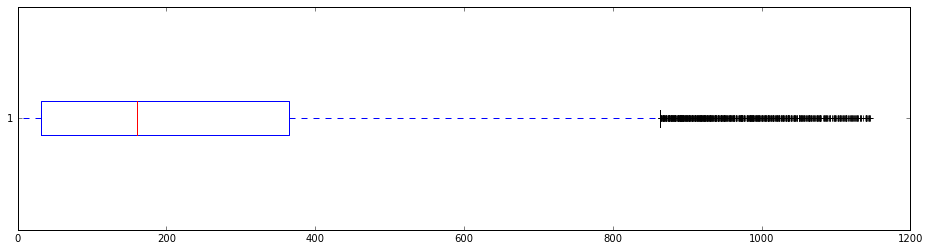

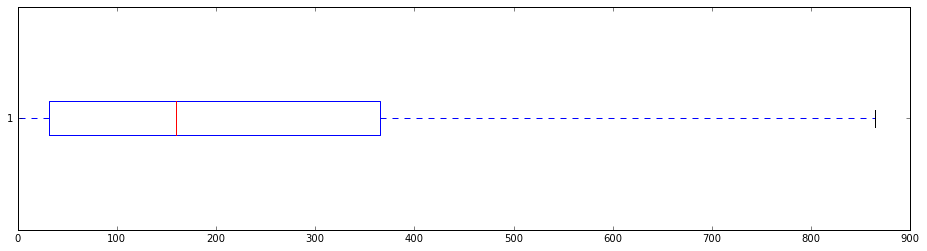

In [32]:
plt.boxplot(diffs_sign, vert=False)
plt.show()
plt.boxplot(diffs_sign, vert=False, sym='')
plt.show()